## 1. Ising Model on a square lattice
Write a code for a 2D Ising model on a square lattice in equilibrium with a thermal bath,
without external magnetic field, using the spin 
flip dynamics (considered as an actual
temporal evolution process), and periodic boundary conditions (PBC).(a) Choose L=30, T=2, and initially spin=s randomly. Calculate and plot the instantaneous values of energy E/N and magnetization M/N per particle as a function of Metropolis-Monte Carlo steps: how much time (i.e. how many n_equil MC steps) is necessary to equilibrate the system? Plot the final snapshot of the spin pattern: does the system appear ordered or disordered? Calculate also c and $\chi$.

In [1]:
%matplotlib inline
import numpy as np

def chessboard(w, h) :
    cb=np.ones((w,h))
    for i in range(w):
        for j in range(h):
            if (i+j)%2==1:
                cb[i,j]=-1
    return cb

def split(w, h) :
    cb=np.ones((w,h))
    for i in range(w):
        for j in range(int(h/2)):
            cb[i,j]=-1
    return cb

def energy(spin):
    L1,L2=np.shape(spin)
    E=0
    for x in range(L1):
        for y in range(L2):
            nnsum=spin[(x+1)%L1,y]+spin[x,(y+1)%L2]
            E=E-spin[x,y]*nnsum
    return E

def delta_energy(spin,x,y):
    L1,L2=np.shape(spin)
    dE=2*spin[x,y]*(spin[(x+1)%L1,y]+spin[x,(y+1)%L2]+spin[(x-1)%L1,y]+spin[x,(y-1)%L2])
    return dE

def metropolis_ising(L,b,n):
    #spin=2*np.random.randint(0,2,(L,L))-1   #random spin lattice
    spin=np.ones((L,L))                     #all spin up lattice
    #spin=-np.ones((L,L))                    #all spin down lattice
    #spin=chessboard(L,L)                    #chessboard lattice
    #spin=split(L,L)                          #half up half down
    
    Marr=[]
    Earr=[]
    na=0
    
    M=np.sum(spin)
    E=energy(spin)

    for i in range(n):
        Earr.append(E)
        Marr.append(M)
        
        x=np.random.randint(L)
        y=np.random.randint(L)
        
        dE=delta_energy(spin,x,y)
        r=np.random.uniform()
        
        if np.exp(-b*dE)>=r:          #accept
            spin[x,y]=-spin[x,y]      #flip
            na=na+1
            E=E+dE
            M=M+2*spin[x,y]
            
    return np.array(Earr), np.array(Marr), spin

In [ ]:
n=500000
L=30
b=0.5
N=L**2
E,M,spin=metropolis_ising(L,b,n)

In [ ]:
import matplotlib.pyplot as plt
ran=range(n)
plt.plot(ran,M/N)
plt.suptitle(r'M vs. $n_{step}$', fontsize=14)


In [ ]:
f=300000
ran=range(n)[f:]
E=E[f:]
M=M[f:]

print('c=',b**2*np.var(E)/N, '\t','\chi=', b*np.var(M)/N)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Energy evolution
ax[0,0].plot(ran,E/N)
ax[0,0].set(xlabel='n',ylabel='E/N', title ='Energy vs n_step')

#Magnetization evolution
ax[0,1].plot(ran,M/N)
ax[0,1].set(xlabel='n',ylabel='M/N', title ='Magnetization vs n_step')


#Energy histogram
ax[1,0].hist(E/N, density=True)
ax[1,0].set(xlabel='E',ylabel='P(E)', title ='Energy distribution')

#Magnetization histogram
ax[1,1].hist(M/N, density=True)
ax[1,1].set(xlabel='M',ylabel='P(M)', title ='Magnetization distribution')

#set overall title
plt.suptitle(r'$\beta = $' + str(b), fontsize=14)

# set the spacing between subplots
fig.tight_layout()

plt.show()

In [ ]:
#spin=2*np.random.randint(0,2,(L,L))-1   #random spin lattice
#spin=np.ones((L,L))                     #all spin up lattice
#spin=-np.ones((L,L))                    #all spin down lattice
spin=chessboard(L,L)                    #chessboard lattice
#spin=split(L,L)   
plt.imshow(spin, extent=(0,L,0,L), vmin=-1, vmax=1)

(c) For xed T, e.g. for T=1 or T=2, change the initial condition of magnetization (choose
for instance some typical ordered configurations -all spins up, all spins down, alternatively up or down as on a chessboard, all left hand side spins up and all right hand side down, . . . ). Does the equilibration time change?

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

#Energy evolution
ax[0].plot(range(n),E/N)
ax[0].set(xlabel='n',ylabel='E/N', title ='Energy vs n_step')

#Energy histogram
ax[1].hist(E/N, density=True)
ax[1].set(xlabel='E',ylabel='P(E)', title ='Energy distribution')

#set overall title
plt.suptitle('Random, '+r'$\beta = $' + str(b), fontsize=14)

# set the spacing between subplots
fig.tight_layout()

plt.show()

(d) Change the temperature T by varying it from 1 to 4 with steps of T = 0:5. Consider
runs long enough, so that the equilibrium has been reached and enough statistical data
are collected. Calculate hEi/N, hMi/N, c and ; plot these quantities as functions
of T. Can you estimate from the plots the critical temperature (whose value Tc =
2:269 J=kB for 2D is known in case L ! 1)? Calculate numerically c both in terms of
energy 
uctuations and doing the numerical derivative with respect to the temperature.
Compare the results.

In [8]:
Tvalues = np.linspace(1,4,8)
n=300000
n_scarto=100000
L=30
N=L**2
Eav=[]
Mav=[]
c=[]
chi=[]
slist=[]

for T in Tvalues:
    b=1/T
    E,M,spin=metropolis_ising(L,b,n)
    E=E[n_scarto:]
    M=M[n_scarto:]
    Eav.append(np.average(E)/N)
    Mav.append(np.average(M)/N)
    c.append(b**2*np.var(E)/N)
    chi.append(b*np.var(M)/N)
    slist.append(spin)

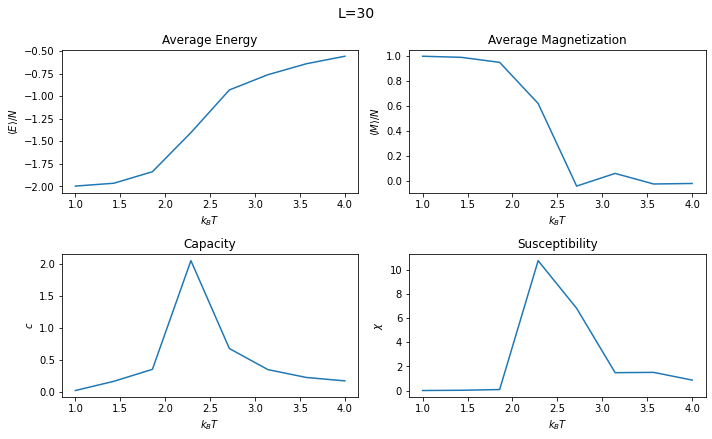

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10/1.62))

#capacity 
ax[0,0].plot(Tvalues,Eav)
ax[0,0].set(xlabel=r'$k_BT$',ylabel=r'$\langle E \rangle/N$', title ='Average Energy')

#susceptibility 
ax[0,1].plot(Tvalues,Mav)
ax[0,1].set(xlabel=r'$k_BT$',ylabel=r'$\langle M \rangle/N$', title ='Average Magnetization')

#capacity 
ax[1,0].plot(Tvalues,c)
ax[1,0].set(xlabel=r'$k_BT$',ylabel=r'$c$', title ='Capacity')

#susceptibility 
ax[1,1].plot(Tvalues,chi)
ax[1,1].set(xlabel=r'$k_BT$',ylabel=r'$\chi$', title ='Susceptibility')


#set overall title
plt.suptitle('L='+str(L), fontsize=14)

# set the spacing between subplots
fig.tight_layout()

plt.show()

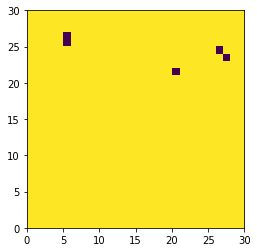

In [4]:
plt.imshow(slist[1], extent=(0,L,0,L), vmin=-1, vmax=1)

(f) Open Boundary Conditions

In [ ]:
import numpy as np
def energy_obc(spin):
    L1,L2=np.shape(spin)
    E=0
    for x in range(L1-1):
        for y in range(L2-1):
            nnsum=spin[x+1,y]+spin[x,y+1]
            E=E-spin[x,y]*nnsum
    return E


def delta_energy_obc(spin,x,y):
    L1,L2=np.shape(spin)
    nnsum=0
    if x!=0:
        nnsum=nnsum+spin[x-1,y]
    if y!=0:
        nnsum=nnsum+spin[x,y-1]
    if x!=L1-1:
        nnsum=nnsum+spin[x+1,y]
    if y!=L2-1:
        nnsum=nnsum+spin[x,y+1]
    dE=spin[x,y]*nnsum
    return dE

def metropolis_ising_obc(L,b,n):
    spin=2*np.random.randint(0,2,(L,L))-1   #random spin lattice
    
    Marr=[]
    Earr=[]
    na=0
    
    M=np.sum(spin)
    E=energy_obc(spin)

    for i in range(n):
        Earr.append(E)
        Marr.append(M)
        
        x=np.random.randint(L)
        y=np.random.randint(L)
        
        dE=delta_energy_obc(spin,x,y)
        r=np.random.uniform()
        
        if np.exp(-b*dE)>=r:          #accept
            spin[x,y]=-spin[x,y]      #flip
            na=na+1
            E=E+dE
            M=M+2*spin[x,y]
            
    return np.array(Earr), np.array(Marr)

In [ ]:
n=100000
L=4
b=0.5
N=L**2
E,M=metropolis_ising_obc(L,b,n)

print('c=',b**2*np.var(E)/N, '\t','\chi=', b*np.var(M)/N)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Energy evolution
ax[0,0].plot(range(n),E/N)
ax[0,0].set(xlabel='n',ylabel='E/N', title ='Energy vs n_step')

#Magnetization evolution
ax[0,1].plot(range(n),M/N)
ax[0,1].set(xlabel='n',ylabel='M/N', title ='Magnetization vs n_step')

#Energy histogram
ax[1,0].hist(E/N, density=True)
ax[1,0].set(xlabel='E',ylabel='P(E)', title ='Energy distribution')

#Magnetization histogram
ax[1,1].hist(M/N, density=True)
ax[1,1].set(xlabel='M',ylabel='P(M)', title ='Magnetization distribution')

#set overall title
plt.suptitle(r'$\beta = $' + str(b), fontsize=14)

# set the spacing between subplots
fig.tight_layout()

plt.show()

## ANIMATED PLOT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

Questa funzione restituisce n/dn array LxL, corrispondenti a degli array di spin di Insing

In [ ]:
def metropolis_ising_lattice(L,b,n):
    spin=2*np.random.randint(0,2,(L,L))-1   #random spin lattice
    Sarr=np.empty((n,L,L), dtype=int)
        
    for i in range(n):
        Sarr[i]=spin
        x=np.random.randint(L)
        y=np.random.randint(L)
        
        dE=delta_energy(spin,x,y)
        r=np.random.uniform(0,1)
        
        if np.exp(-b*dE)>=r:             #accept            
            spin[x,y]= - spin[x,y]        #flip

    return Sarr

In [ ]:
n=5000               #passi del metropolis
L=30
b=0.5

fps=40               #fotogrammi per secondo

t_delay = 1000/fps   #delay between frames in milliseconds
t_points=n           #fotogrammi totali
t_max = n/(fps)      #tempo finale

t = np.linspace(0, t_max, t_points)
spin=metropolis_ising_lattice(L,b,n)

In [ ]:
def func(num,spin,t):
    
    #Clears the figure
    ax.clear()                         
    
    #Add pixel plot
    ax.imshow(spin[num], extent=(0,L,0,L))  

    #Add Figure Labels
    ax.set_title('Metropolis step ' + str(num))
    ax.set_xticks(range(0,L+2,2))
    ax.set_yticks(range(0,L+2,2))


In [ ]:
%matplotlib notebook

# Plotting the Animation
fig = plt.figure()
ax = plt.axes()
line_ani = animation.FuncAnimation(fig, func, interval=t_delay,frames=t_points,fargs=(spin,t))
plt.show()

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=40, metadata=dict(artist='Leonardo Cruciani'), bitrate=7200)
line_ani.save('Ising.mp4', writer=writer)